## Heart Attack Prediction Model

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [2]:
# import csv
df = pd.read_csv("heart_2022_with_nans.csv")

In [3]:
df

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,Virgin Islands,Female,Good,0.0,3.0,Within past 2 years (1 year but less than 2 ye...,Yes,6.0,None of them,No,...,1.65,69.85,25.63,NaN,Yes,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
445128,Virgin Islands,Female,Excellent,2.0,2.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.70,83.01,28.66,No,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
445129,Virgin Islands,Female,Poor,30.0,30.0,5 or more years ago,No,5.0,1 to 5,No,...,1.70,49.90,17.23,NaN,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
445130,Virgin Islands,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,5.0,None of them,Yes,...,1.83,108.86,32.55,No,Yes,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes


### EXPLORATORY DATA ANALYSIS

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

##### Checking for NULL values

In [5]:
df.isnull().sum()

State                            0
Sex                              0
GeneralHealth                 1198
PhysicalHealthDays           10927
MentalHealthDays              9067
LastCheckupTime               8308
PhysicalActivities            1093
SleepHours                    5453
RemovedTeeth                 11360
HadHeartAttack                3065
HadAngina                     4405
HadStroke                     1557
HadAsthma                     1773
HadSkinCancer                 3143
HadCOPD                       2219
HadDepressiveDisorder         2812
HadKidneyDisease              1926
HadArthritis                  2633
HadDiabetes                   1087
DeafOrHardOfHearing          20647
BlindOrVisionDifficulty      21564
DifficultyConcentrating      24240
DifficultyWalking            24012
DifficultyDressingBathing    23915
DifficultyErrands            25656
SmokerStatus                 35462
ECigaretteUsage              35660
ChestScan                    56046
RaceEthnicityCategor

#### Drop NULL values

In [6]:
cleaned_df = df.dropna()

In [7]:
cleaned_df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
342,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
343,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
345,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
346,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
347,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [8]:
cleaned_df.HadHeartAttack.value_counts()

HadHeartAttack
No     232587
Yes     13435
Name: count, dtype: int64

In [9]:
cleaned_df.isnull().sum()

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI     

In [10]:
#extract the first words in TetanusLast10Tdap
cleaned_df["TetanusLast10Tdap"] =  cleaned_df["TetanusLast10Tdap"].str.split().str[0].str.strip(",")
cleaned_df["TetanusLast10Tdap"]


C:\Users\Sir Ekemini\AppData\Local\Temp\ipykernel_7200\2513974859.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["TetanusLast10Tdap"] =  cleaned_df["TetanusLast10Tdap"].str.split().str[0].str.strip(",")


342       Yes
343       Yes
345        No
346        No
347        No
         ... 
445117    Yes
445123     No
445124    Yes
445128    Yes
445130     No
Name: TetanusLast10Tdap, Length: 246022, dtype: object

In [11]:
cleaned_df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
342,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,Yes,No,No
343,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,Yes,No,No
345,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,No,No,Yes
346,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,No,No,Yes
347,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,No,No,No


In [12]:
cleaned_df.LastCheckupTime.unique()

array(['Within past year (anytime less than 12 months ago)',
       '5 or more years ago',
       'Within past 2 years (1 year but less than 2 years ago)',
       'Within past 5 years (2 years but less than 5 years ago)'],
      dtype=object)

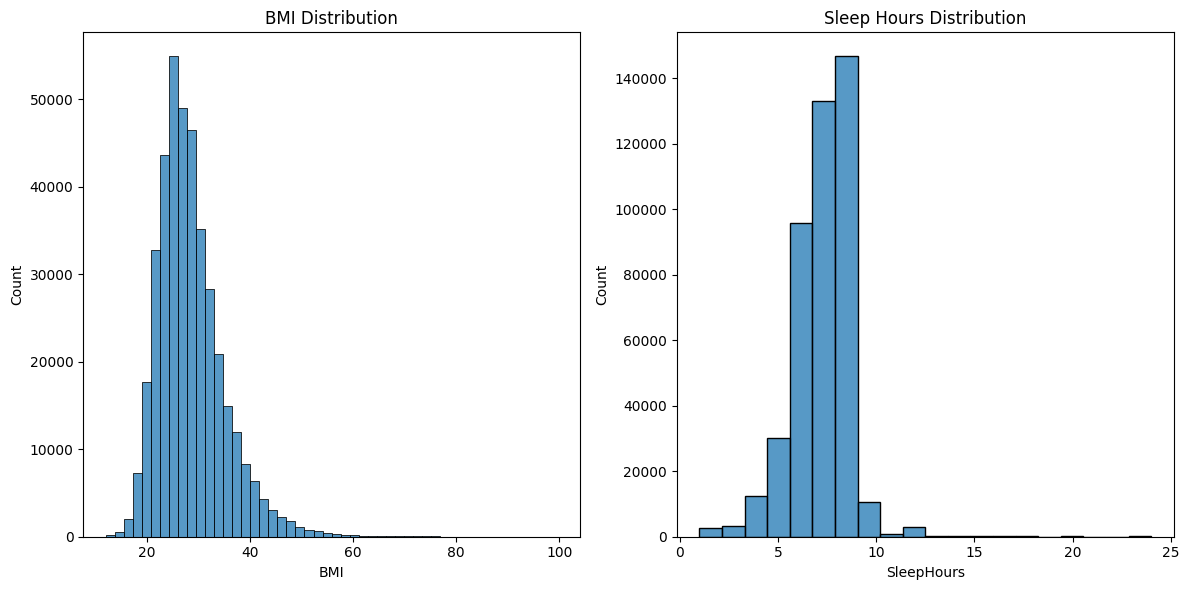

Key Health Metrics Summary:
                 BMI     SleepHours  PhysicalHealthDays  MentalHealthDays
count  396326.000000  439679.000000       434205.000000     436065.000000
mean       28.529842       7.022983            4.347919          4.382649
std         6.554889       1.502425            8.688912          8.387475
min        12.020000       1.000000            0.000000          0.000000
25%        24.130000       6.000000            0.000000          0.000000
50%        27.440000       7.000000            0.000000          0.000000
75%        31.750000       8.000000            3.000000          5.000000
max        99.640000      24.000000           30.000000         30.000000


In [13]:

# Create a figure with subplots
plt.figure(figsize=(12, 6))

# Plot BMI distribution
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='BMI', bins=50)
plt.title('BMI Distribution')

# Plot Sleep Hours distribution
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='SleepHours', bins=20)
plt.title('Sleep Hours Distribution')

plt.tight_layout()
plt.show()

# Display some key statistics
print("\
Key Health Metrics Summary:")
print(df[['BMI', 'SleepHours', 'PhysicalHealthDays', 'MentalHealthDays']].describe())

**OBSERVATION**
The distribution of BMI and sleep hours indicates key health metrics for the dataset.

**BMI Distribution:** The BMI values are mostly concentrated around 25-30, with a mean of approximately 28.5, which falls in the overweight range. This distribution is skewed to the right, suggesting some individuals have higher BMI values, but these cases are less frequent.

**Sleep Hours Distribution:** Most individuals have around 6-9 hours of sleep, with the mean close to 7 hours. There are a few outliers with very low or very high sleep hours, but these are rare.

Sex
Female    4.132288
Male      7.428161
Name: HadHeartAttack, dtype: float64


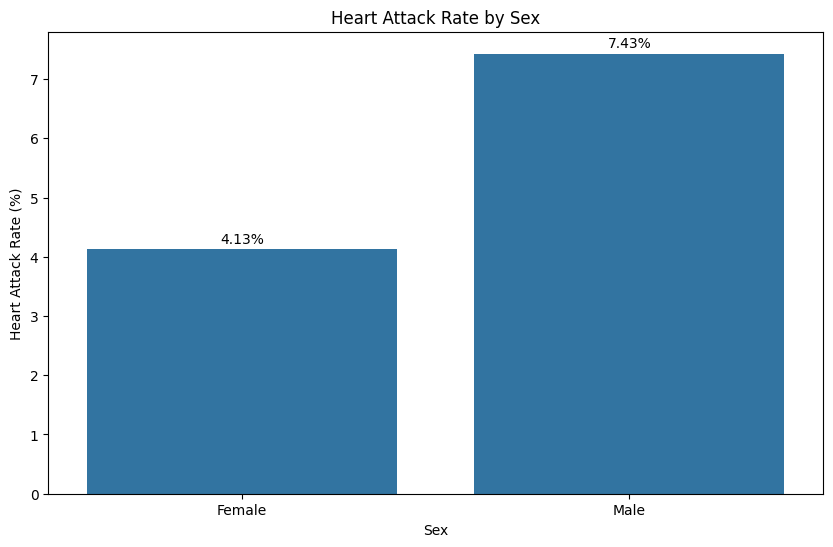

Heart Attack Rates by Sex:
Female: 4.13%
Male: 7.43%


In [14]:

# Convert "Yes" and "No" in HadHeartAttack to numeric values
df['HadHeartAttack'] = df['HadHeartAttack'].map({'Yes': 1, 'No': 0})

# Calculate heart attack rate by sex
heart_attack_by_sex = df.groupby('Sex')['HadHeartAttack'].mean() * 100
print(heart_attack_by_sex )

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=heart_attack_by_sex.index, y=heart_attack_by_sex.values)
plt.title('Heart Attack Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Heart Attack Rate (%)')

# Add percentage labels on top of each bar
for i, v in enumerate(heart_attack_by_sex.values):
    plt.text(i, v + 0.1, f'{v:.2f}%', ha='center')

plt.show()

# Print the actual percentages
print("Heart Attack Rates by Sex:")
for sex, rate in heart_attack_by_sex.items():
    print(f"{sex}: {rate:.2f}%")


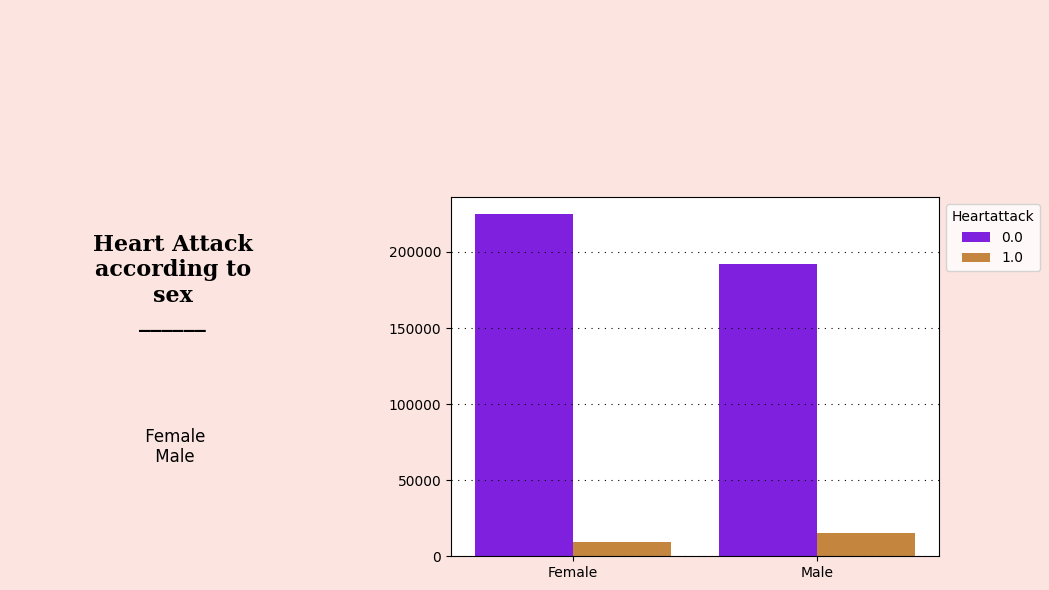

In [15]:
# Set the figure and grid specification
fig = plt.figure(figsize=(14, 6), facecolor="#fce5e0")
gs = GridSpec(3, 3, figure=fig, width_ratios=[1, 1.5, 1])

# Left panel with text
ax_text = fig.add_subplot(gs[:, 0])
ax_text.text(0.5, 0.5, "Heart Attack\naccording to\nsex\n______", 
             ha='center', va='center', fontsize=16, fontweight='bold', fontfamily='serif')
ax_text.text(0.5, 0.2, " Female\n Male", ha='center', va='center', fontsize=12)
ax_text.axis('off')

# Right panel with count plot
ax_count = fig.add_subplot(gs[1:, 1])
ax_count.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1, 5))
sns.countplot(ax=ax_count, data=df, x='Sex', hue='HadHeartAttack', palette=["#8000ff", "#da8829"])
ax_count.set_xlabel("")
ax_count.set_ylabel("")

# Display the legend and adjust layout
plt.legend(title="Heartattack", loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


**Observation**
This shows the distribution of heart attack occurrences by gender. The majority of cases for both females and males did not experience a heart attack. However, a small proportion in both genders experienced a heart attack, with a slightly higher incidence in males than females. Suggesting that while heart attack occurrences are relatively low, there may be a slight gender disparity in heart attack risk, with males being marginally more affected in this dataset.

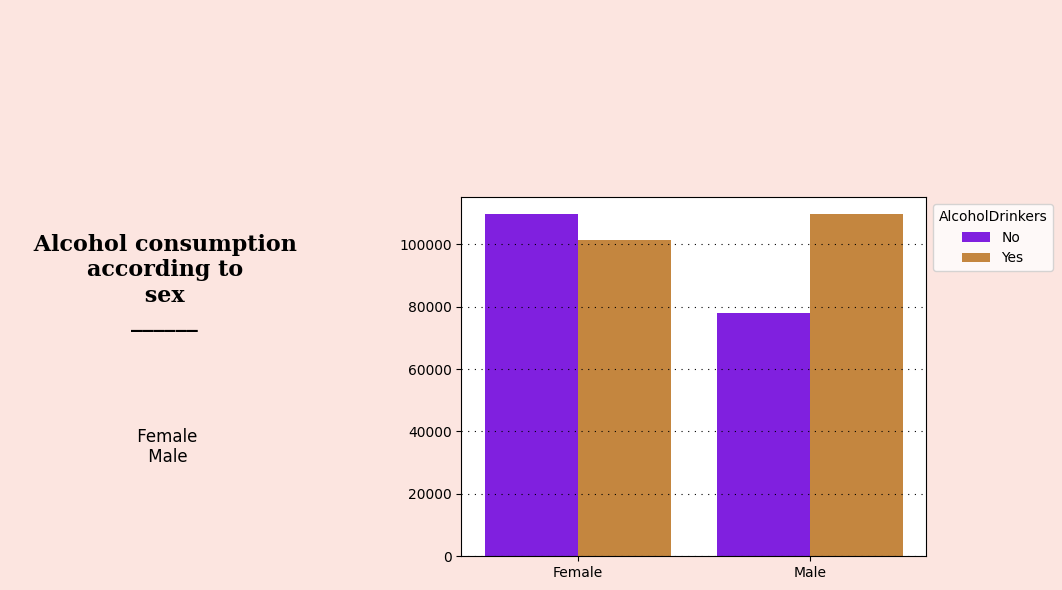

In [16]:
# Set the figure and grid specification
fig = plt.figure(figsize=(14, 6), facecolor="#fce5e0")
gs = GridSpec(3, 3, figure=fig, width_ratios=[1, 1.5, 1])

# Left panel with text
ax_text = fig.add_subplot(gs[:, 0])
ax_text.text(0.5, 0.5, " Alcohol consumption \naccording to\n sex \n______", 
             ha='center', va='center', fontsize=16, fontweight='bold', fontfamily='serif')
ax_text.text(0.5, 0.2, " Female\n Male", ha='center', va='center', fontsize=12)
ax_text.axis('off')

# Right panel with count plot
ax_count = fig.add_subplot(gs[1:, 1])
ax_count.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1, 5))
sns.countplot(ax=ax_count, data=df, x='Sex', hue='AlcoholDrinkers', palette=["#8000ff", "#da8829"])
ax_count.set_xlabel("")
ax_count.set_ylabel("")

# Display the legend and adjust layout
plt.legend(title="AlcoholDrinkers", loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()



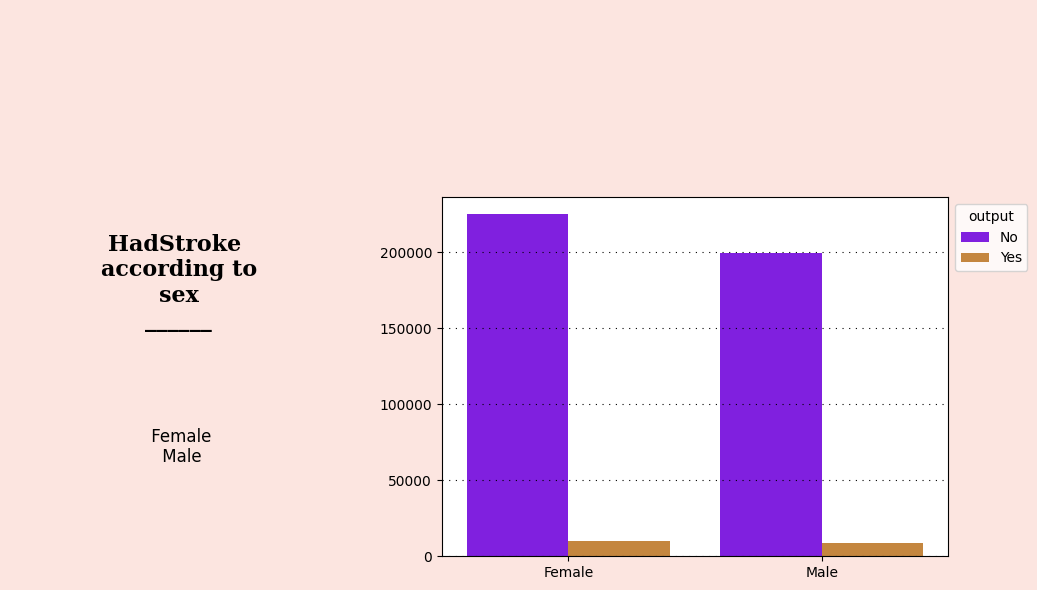

In [18]:
# Set the figure and grid specification
fig = plt.figure(figsize=(14, 6), facecolor="#fce5e0")
gs = GridSpec(3, 3, figure=fig, width_ratios=[1, 1.5, 1])

# Left panel with text
ax_text = fig.add_subplot(gs[:, 0])
ax_text.text(0.5, 0.5, "HadStroke \naccording to\nsex\n______", 
             ha='center', va='center', fontsize=16, fontweight='bold', fontfamily='serif')
ax_text.text(0.5, 0.2, " Female\n Male", ha='center', va='center', fontsize=12)
ax_text.axis('off')

# Right panel with count plot
ax_count = fig.add_subplot(gs[1:, 1])
ax_count.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1, 5))
sns.countplot(ax=ax_count, data=df, x='Sex', hue='HadStroke', palette=["#8000ff", "#da8829"])
ax_count.set_xlabel("")
ax_count.set_ylabel("")

# Display the legend and adjust layout
plt.legend(title="output", loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

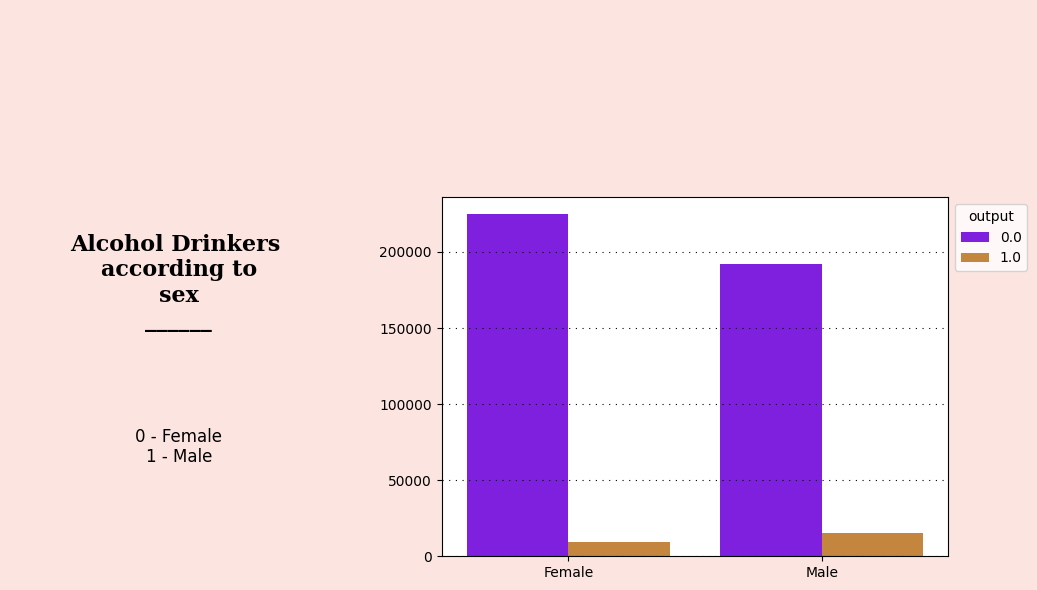

In [19]:
# Set the figure and grid specification
fig = plt.figure(figsize=(14, 6), facecolor="#fce5e0")
gs = GridSpec(3, 3, figure=fig, width_ratios=[1, 1.5, 1])

# Left panel with text
ax_text = fig.add_subplot(gs[:, 0])
ax_text.text(0.5, 0.5, "Alcohol Drinkers \naccording to\nsex\n______", 
             ha='center', va='center', fontsize=16, fontweight='bold', fontfamily='serif')
ax_text.text(0.5, 0.2, "0 - Female\n1 - Male", ha='center', va='center', fontsize=12)
ax_text.axis('off')

# Right panel with count plot
ax_count = fig.add_subplot(gs[1:, 1])
ax_count.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1, 5))
sns.countplot(ax=ax_count, data=df, x='Sex', hue='HadHeartAttack', palette=["#8000ff", "#da8829"])
ax_count.set_xlabel("")
ax_count.set_ylabel("")

# Display the legend and adjust layout
plt.legend(title="output", loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

In [20]:
# sns.pairplot(df,hue='HadHeartAttack',palette = ["#8000ff","#da8829"])
# plt.show()

#### Dropping some irrelevant columns

In [21]:
df['HadHeartAttack']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
445127    0.0
445128    0.0
445129    0.0
445130    1.0
445131    0.0
Name: HadHeartAttack, Length: 445132, dtype: float64

In [22]:
cleaned_df.drop(columns=["RemovedTeeth", "State"], inplace=True)

C:\Users\Sir Ekemini\AppData\Local\Temp\ipykernel_7200\1046452027.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.drop(columns=["RemovedTeeth", "State"], inplace=True)


In [23]:
# Map the time periods to numerical values
cleaned_df['LastCheckupTime'] = cleaned_df['LastCheckupTime'].map({
    'Within past year (anytime less than 12 months ago)': 1,
    'Within past 2 years (1 year but less than 2 years ago)': 2,
    'Within past 5 years (2 years but less than 5 years ago)': 5,
    '5 or more years ago': 6
})

C:\Users\Sir Ekemini\AppData\Local\Temp\ipykernel_7200\4036590856.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['LastCheckupTime'] = cleaned_df['LastCheckupTime'].map({


In [24]:
cleaned_df['LastCheckupTime']

342       1
343       1
345       1
346       1
347       1
         ..
445117    2
445123    1
445124    1
445128    1
445130    1
Name: LastCheckupTime, Length: 246022, dtype: int64

In [25]:
cleaned_df.tail()

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
445117,Male,Very good,0.0,0.0,2,Yes,6.0,No,No,No,...,1.78,102.06,32.28,Yes,No,No,No,Yes,No,No
445123,Female,Fair,0.0,7.0,1,Yes,7.0,No,No,No,...,1.93,90.72,24.34,No,No,No,No,No,No,Yes
445124,Male,Good,0.0,15.0,1,Yes,7.0,No,No,Yes,...,1.68,83.91,29.86,Yes,Yes,Yes,Yes,Yes,No,Yes
445128,Female,Excellent,2.0,2.0,1,Yes,7.0,No,No,No,...,1.70,83.01,28.66,No,Yes,Yes,No,Yes,No,No
445130,Male,Very good,0.0,0.0,1,No,5.0,Yes,No,No,...,1.83,108.86,32.55,No,Yes,Yes,Yes,No,No,Yes


In [26]:
cleaned_df["GeneralHealth"].unique()

array(['Very good', 'Fair', 'Good', 'Excellent', 'Poor'], dtype=object)

In [27]:
# Map the general health categories to numerical values
cleaned_df['GeneralHealth'] = df['GeneralHealth'].map({
    'Poor': 1,
    'Fair': 2,
    'Good': 3,
    'Very good': 4,
    'Excellent': 5
})

C:\Users\Sir Ekemini\AppData\Local\Temp\ipykernel_7200\2192146321.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['GeneralHealth'] = df['GeneralHealth'].map({


In [28]:
cleaned_df.head()

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
342,Female,4.0,4.0,0.0,1,Yes,9.0,No,No,No,...,1.60,71.67,27.99,No,No,Yes,Yes,Yes,No,No
343,Male,4.0,0.0,0.0,1,Yes,6.0,No,No,No,...,1.78,95.25,30.13,No,No,Yes,Yes,Yes,No,No
345,Male,4.0,0.0,0.0,1,No,8.0,No,No,No,...,1.85,108.86,31.66,Yes,No,No,Yes,No,No,Yes
346,Female,2.0,5.0,0.0,1,Yes,9.0,No,No,No,...,1.70,90.72,31.32,No,No,Yes,Yes,No,No,Yes
347,Female,3.0,3.0,15.0,1,Yes,5.0,No,No,No,...,1.55,79.38,33.07,No,No,Yes,Yes,No,No,No


In [29]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246022 entries, 342 to 445130
Data columns (total 38 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Sex                        246022 non-null  object 
 1   GeneralHealth              246022 non-null  float64
 2   PhysicalHealthDays         246022 non-null  float64
 3   MentalHealthDays           246022 non-null  float64
 4   LastCheckupTime            246022 non-null  int64  
 5   PhysicalActivities         246022 non-null  object 
 6   SleepHours                 246022 non-null  float64
 7   HadHeartAttack             246022 non-null  object 
 8   HadAngina                  246022 non-null  object 
 9   HadStroke                  246022 non-null  object 
 10  HadAsthma                  246022 non-null  object 
 11  HadSkinCancer              246022 non-null  object 
 12  HadCOPD                    246022 non-null  object 
 13  HadDepressiveDisorder      24602

In [30]:
cleaned_df.dtypes

Sex                           object
GeneralHealth                float64
PhysicalHealthDays           float64
MentalHealthDays             float64
LastCheckupTime                int64
PhysicalActivities            object
SleepHours                   float64
HadHeartAttack                object
HadAngina                     object
HadStroke                     object
HadAsthma                     object
HadSkinCancer                 object
HadCOPD                       object
HadDepressiveDisorder         object
HadKidneyDisease              object
HadArthritis                  object
HadDiabetes                   object
DeafOrHardOfHearing           object
BlindOrVisionDifficulty       object
DifficultyConcentrating       object
DifficultyWalking             object
DifficultyDressingBathing     object
DifficultyErrands             object
SmokerStatus                  object
ECigaretteUsage               object
ChestScan                     object
RaceEthnicityCategory         object
A

In [31]:
df_corr = cleaned_df.select_dtypes("bool")

In [32]:
# columns we want to encode
object_col = cleaned_df.select_dtypes("object").columns

# encoding the categorical columns
df = pd.get_dummies(cleaned_df, columns=object_col, drop_first = True)


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246022 entries, 342 to 445130
Data columns (total 59 columns):
 #   Column                                                                  Non-Null Count   Dtype  
---  ------                                                                  --------------   -----  
 0   GeneralHealth                                                           246022 non-null  float64
 1   PhysicalHealthDays                                                      246022 non-null  float64
 2   MentalHealthDays                                                        246022 non-null  float64
 3   LastCheckupTime                                                         246022 non-null  int64  
 4   SleepHours                                                              246022 non-null  float64
 5   HeightInMeters                                                          246022 non-null  float64
 6   WeightInKilograms                                                      

In [34]:
df

,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,SleepHours,HeightInMeters,WeightInKilograms,BMI,Sex_Male,PhysicalActivities_Yes,...,AgeCategory_Age 75 to 79,AgeCategory_Age 80 or older,AlcoholDrinkers_Yes,HIVTesting_Yes,FluVaxLast12_Yes,PneumoVaxEver_Yes,TetanusLast10Tdap_Yes,HighRiskLastYear_Yes,CovidPos_Tested positive using home test without a health professional,CovidPos_Yes
342,4.0,4.0,0.0,1,9.0,1.60,71.67,27.99,False,True,...,False,False,False,False,True,True,True,False,False,False
343,4.0,0.0,0.0,1,6.0,1.78,95.25,30.13,True,True,...,False,False,False,False,True,True,True,False,False,False
345,4.0,0.0,0.0,1,8.0,1.85,108.86,31.66,True,False,...,True,False,True,False,False,True,False,False,False,True
346,2.0,5.0,0.0,1,9.0,1.70,90.72,31.32,False,True,...,False,True,False,False,True,True,False,False,False,True
347,3.0,3.0,15.0,1,5.0,1.55,79.38,33.07,False,True,...,False,True,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445117,4.0,0.0,0.0,2,6.0,1.78,102.06,32.28,True,True,...,False,False,True,False,False,False,True,False,False,False
445123,2.0,0.0,7.0,1,7.0,1.93,90.72,24.34,False,True,...,False,False,False,False,False,False,False,False,False,True
445124,3.0,0.0,15.0,1,7.0,1.68,83.91,29.86,True,True,...,False,False,True,True,True,True,True,False,False,True
445128,5.0,2.0,2.0,1,7.0,1.70,83.01,28.66,False,True,...,False,False,False,True,True,False,True,False,False,False


In [35]:
df_corr = df.corr()


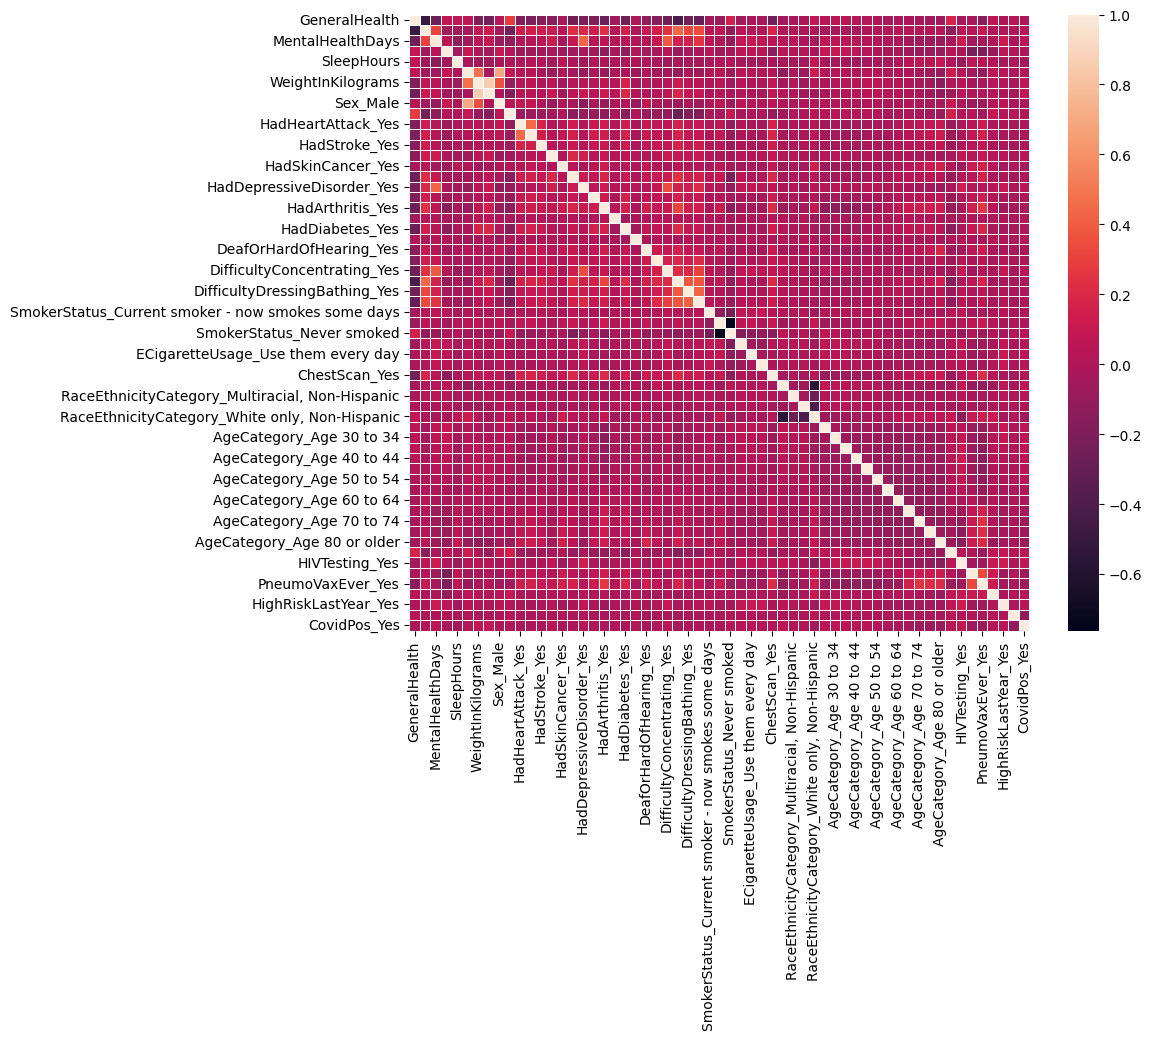

In [36]:
#Plot the heatmap
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(df_corr,  linewidths=0.5)

# 3. Display the plot
plt.show()

In [37]:
# 1. Calculate the correlation matrix
corr = df_corr.abs()  # Use absolute value to consider both positive and negative correlations

# Set a threshold for high correlation 
threshold = 0.7

# Find feature pairs with correlation above the threshold
high_corr_pairs = np.where(corr > threshold)
high_corr_pairs = [(corr.index[x], corr.columns[y]) for x, y in zip(*high_corr_pairs) if x != y and x < y]

# Print the highly correlated pairs
print("Highly correlated pairs:")
for pair in high_corr_pairs:
    print(pair)

# Here, we drop one feature in each pair (you can modify this based on your domain knowledge)
to_drop = set([pair[0] for pair in high_corr_pairs])  # Dropping the second feature in each pair
df_reduced = df.drop(columns=to_drop)

print(f"Dropped columns: {to_drop}")

Highly correlated pairs:
('WeightInKilograms', 'BMI')
('SmokerStatus_Former smoker', 'SmokerStatus_Never smoked')
Dropped columns: {'WeightInKilograms', 'SmokerStatus_Former smoker'}


In [38]:
# dropping the correlated column with less relevance
df.drop(columns=["SmokerStatus_Former smoker", "WeightInKilograms"], inplace=True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246022 entries, 342 to 445130
Data columns (total 57 columns):
 #   Column                                                                  Non-Null Count   Dtype  
---  ------                                                                  --------------   -----  
 0   GeneralHealth                                                           246022 non-null  float64
 1   PhysicalHealthDays                                                      246022 non-null  float64
 2   MentalHealthDays                                                        246022 non-null  float64
 3   LastCheckupTime                                                         246022 non-null  int64  
 4   SleepHours                                                              246022 non-null  float64
 5   HeightInMeters                                                          246022 non-null  float64
 6   BMI                                                                    

In [40]:
# spitting out dataset into target vector and feature matrix
target = df["HadHeartAttack_Yes"]
features = df.drop(columns = ["HadHeartAttack_Yes"])

In [41]:
targ = target.value_counts()
targ

HadHeartAttack_Yes
False    232587
True      13435
Name: count, dtype: int64

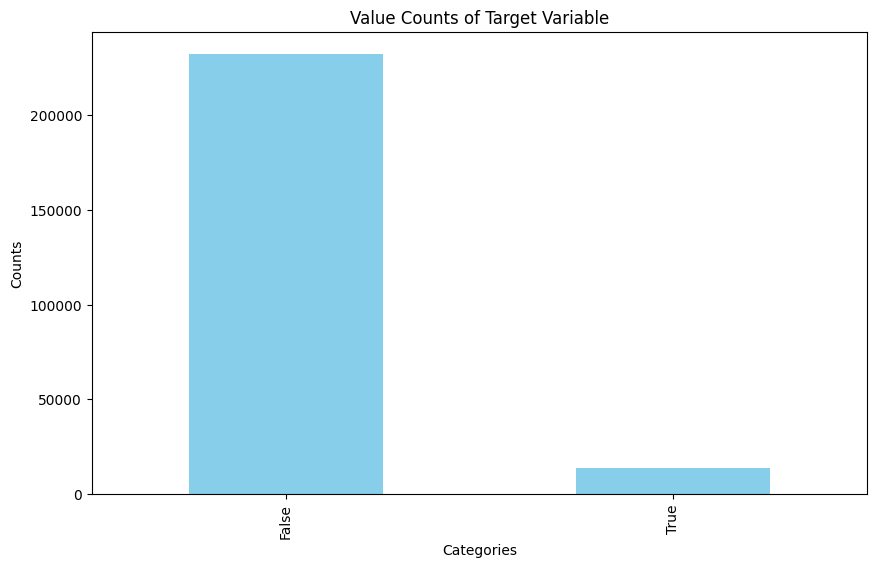

In [42]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
targ.plot(kind='bar', color='skyblue')
plt.title('Value Counts of Target Variable')
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.show()

### Observation:
The target variable in the heart attack dataset shows a significant imbalance, with the "False" category representing a much higher count than the "True" category, as seen in the bar chart. This imbalance indicates that there are far fewer instances of heart attacks (labeled as "True") compared to non-heart attacks (labeled as "False") in the dataset. Such an imbalance could negatively impact the performance of machine learning models, as they may become biased towards the majority class and fail to accurately predict cases in the minority class.

### Recommendation:
To address this imbalance, I recommend using **Synthetic Minority Over-sampling Technique (SMOTE)** on the training set. **SMOTE** generates synthetic samples for the minority class, increasing its representation and balancing the dataset without simply duplicating data points. This approach can help improve model performance, particularly in identifying instances of heart attacks, by ensuring the model is not overly biased toward the majority class.

In [43]:
df.isnull().sum()

GeneralHealth                                                             0
PhysicalHealthDays                                                        0
MentalHealthDays                                                          0
LastCheckupTime                                                           0
SleepHours                                                                0
HeightInMeters                                                            0
BMI                                                                       0
Sex_Male                                                                  0
PhysicalActivities_Yes                                                    0
HadHeartAttack_Yes                                                        0
HadAngina_Yes                                                             0
HadStroke_Yes                                                             0
HadAsthma_Yes                                                             0
HadSkinCance

### Split Dataset into Train, Validate and split

In [44]:
# splitting dataset into train,validate and test set
X_train_val, X_test, y_train_val, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

### Split the train set into train set and Validate set


In [45]:
X_train, X_train_val, y_train, y_train_val = train_test_split(X_train_val, y_train_val, test_size= 0.3, random_state = 42)

### Apply SMOTE
This helps solve the problem of class inbalance. By doing this our model will be able to learn a balance representation of each class without affecting the validate and test set

In [46]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training set
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [47]:
# Step 5: Define parameter grid and use GridSearchCV to find the best model
param_grid = {
    'C': [0.1, 1, 10, 100],         # Regularization strength
    'solver': ['liblinear', 'lbfgs'], # Solver options
    'max_iter': [100, 200, 300]      # Number of iterations
}

In [48]:
# Initialize logistic regression model
model = LogisticRegression(random_state=42)

In [49]:
# Apply GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'max_iter': [100, 200, 300],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='accuracy')

In [50]:
# Get the best model and parameters
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Score:", grid_search.best_score_)

Best Parameters: {'C': 10, 'max_iter': 100, 'solver': 'liblinear'}
Best Cross-Validated Score: 0.926261520312431


In [51]:
y_val_pred = best_model.predict(X_train_val)
print("Validation Accuracy:", accuracy_score(y_train_val, y_val_pred))
print("Validation Classification Report:\n", classification_report(y_train_val, y_val_pred))


Validation Accuracy: 0.9217389831656675
Validation Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.95      0.96     55811
        True       0.35      0.49      0.41      3235

    accuracy                           0.92     59046
   macro avg       0.66      0.72      0.68     59046
weighted avg       0.94      0.92      0.93     59046



In [52]:
y_test_pred = best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))


Test Accuracy: 0.9228736916979982
Test Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.95      0.96     46573
        True       0.34      0.49      0.40      2632

    accuracy                           0.92     49205
   macro avg       0.66      0.72      0.68     49205
weighted avg       0.94      0.92      0.93     49205



From the test results of your heart attack prediction model, here are some observations:

**Overall Accuracy**: The model has an accuracy of approximately 92.07% on the test data, similar to the validation results. However, as with the validation set, accuracy may not be the most informative metric in the context of medical prediction, especially given the class imbalance.

**Class Imbalance and Performance:**

There is a significant class imbalance, with "False" (No Heart Attack) cases (46,573) vastly outnumbering "True" (Heart Attack) cases (2,632). This imbalance heavily influences the model’s performance metrics, especially for the minority class.
Performance on Non-Heart Attack Cases (False):

**Precision (0.97):** 97% of the predicted "No Heart Attack" cases are accurate.
**Recall (0.94):** The model captures 94% of actual "No Heart Attack" cases, meaning it performs well on correctly identifying those without a heart attack.
**F1-Score (0.96):** A high F1-score indicates strong performance for the "No Heart Attack" class.
Performance on Heart Attack Cases (True):

**Precision (0.34):** Only 34% of predicted "Heart Attack" cases are accurate, suggesting a high rate of false positives.
**Recall (0.50):** The model successfully detects 50% of actual heart attack cases, which indicates it misses half of the real heart attack cases (false negatives). In a heart attack prediction context, these missed cases could have serious consequences.
**F1-Score (0.40):** The low F1-score for the "Heart Attack" class suggests that the model struggles to balance precision and recall effectively in this class.


**Macro and Weighted Averages:**

Macro Average (Precision: 0.65, Recall: 0.72, F1-Score: 0.68): This average gives equal weight to both classes, highlighting the model’s challenges with heart attack cases, as it doesn’t perform as well on minority classes.
Weighted Average (Precision: 0.94, Recall: 0.92, F1-Score: 0.93): The high weighted average is skewed by the majority class performance and does not fully reflect the challenges in identifying heart attack cases.
Implications and Recommendations:

**Sensitivity to Heart Attack Cases:** In a heart attack prediction model, it’s critical to improve recall (sensitivity) for heart attack cases, as missed diagnoses (false negatives) could have life-threatening implications.
Improvement Strategies:
Consider class weighting in the model to give more importance to heart attack cases.
Use oversampling for the "True" class or undersampling for the "False" class to address class imbalance.
Explore additional metrics, such as recall for the "True" class specifically, to better gauge the model's ability to catch true heart attack cases.
Improving recall for the "Heart Attack" cases would likely reduce the number of false negatives, making the model more effective in real-world applications where detecting heart attacks is essential.

In [53]:
# Initialize models
random_forest = RandomForestClassifier(random_state=42)


# Train models
random_forest.fit(X_train_smote, y_train_smote)



RandomForestClassifier(random_state=42)

In [54]:
# Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# GridSearch for Random Forest
grid_search_rf = GridSearchCV(random_forest, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train_smote, y_train_smote)

# Get the best model
best_rf = grid_search_rf.best_estimator_
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)


Best Parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


In [55]:
# Predictions on the validation set
y_val_pred_rf = best_rf.predict(X_train_val)


# Evaluation for Random Forest
print("Random Forest Validation Results:")
print("Accuracy:", accuracy_score(y_train_val, y_val_pred_rf))
print("Classification Report:\n", classification_report(y_train_val, y_val_pred_rf))



Random Forest Validation Results:
Accuracy: 0.9396910883040341
Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.97      0.97     55811
        True       0.45      0.44      0.44      3235

    accuracy                           0.94     59046
   macro avg       0.71      0.70      0.71     59046
weighted avg       0.94      0.94      0.94     59046



### We choose the best performing model to test the unseen data

In [56]:
y_test_pred = best_rf.predict(X_test)
print("Test Results for the Best Model:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Test Results for the Best Model:
Accuracy: 0.940636114216035
Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.97      0.97     46573
        True       0.44      0.44      0.44      2632

    accuracy                           0.94     49205
   macro avg       0.71      0.71      0.71     49205
weighted avg       0.94      0.94      0.94     49205



### Result Interpreatation
**Model Performance (Accuracy):**
Random Forest model achieved an accuracy of around 94% on both validation and test datasets, which is very impressive. High accuracy indicates that the model generally performs well on the overall dataset.

**Class Imbalance Challenge:**
It seems that there’s a significant class imbalance, with many more instances of "False" (non-heart attack cases) than "True" (heart attack cases). In health-related predictions, addressing this imbalance is critical because misclassifying a potential heart attack (False Negative) can have serious consequences.

**Precision, Recall, and F1-score for Both Classes:**
**"False" Class:** The model performs very well in predicting the majority class (non-heart attack), with high precision, recall, and F1-score (~0.97). This is a positive outcome, as it indicates reliable predictions for non-heart attack cases.
**"True" Class:** The metrics (precision, recall, F1-score ~0.44) are lower for predicting heart attack cases. This means the model is less effective at identifying true heart attack cases, likely due to the class imbalance.
Macro and Weighted Averages:









### CONCLUSION
After extensive testing and tuning, we finalized a Random Forest model for heart attack prediction. This model demonstrates strong performance on the overall dataset, achieving an accuracy of approximately 94% on both validation and test datasets. 
While our Random Forest model performs well in terms of overall accuracy, there is room to improve its performance on heart attack cases. The current model can be a useful starting point for detecting potential risk, but further refinement is essential to increase its reliability for identifying individuals at higher risk of a heart attack.